In [ ]:
!unzip /content/drive/MyDrive/Datasete/vgsales.csv.zip

Archive:  /content/drive/MyDrive/Datasete/vgsales.csv.zip
  inflating: vgsales.csv             


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/vgsales.csv")

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

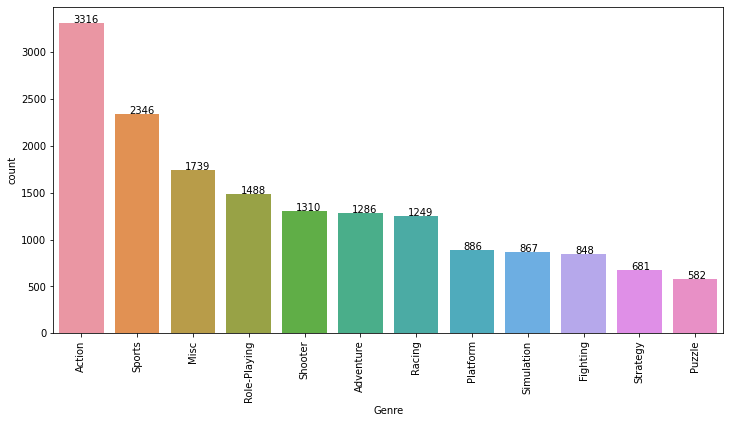

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = 'Genre', data = df, order = df.Genre.value_counts(ascending = False).index)
abs_values = df.Genre.value_counts(ascending = False).values
for p in ax.patches:
  ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 90)

In [ ]:
df.Year.mean().astype(int)

2006

In [ ]:
df.Year = df.Year.fillna(df.Year.mean())

In [ ]:
max(df.Year.value_counts().index)

2020.0

In [ ]:
min(df.Year.value_counts().index)

1980.0

In [ ]:
df.Year = df.Year.astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

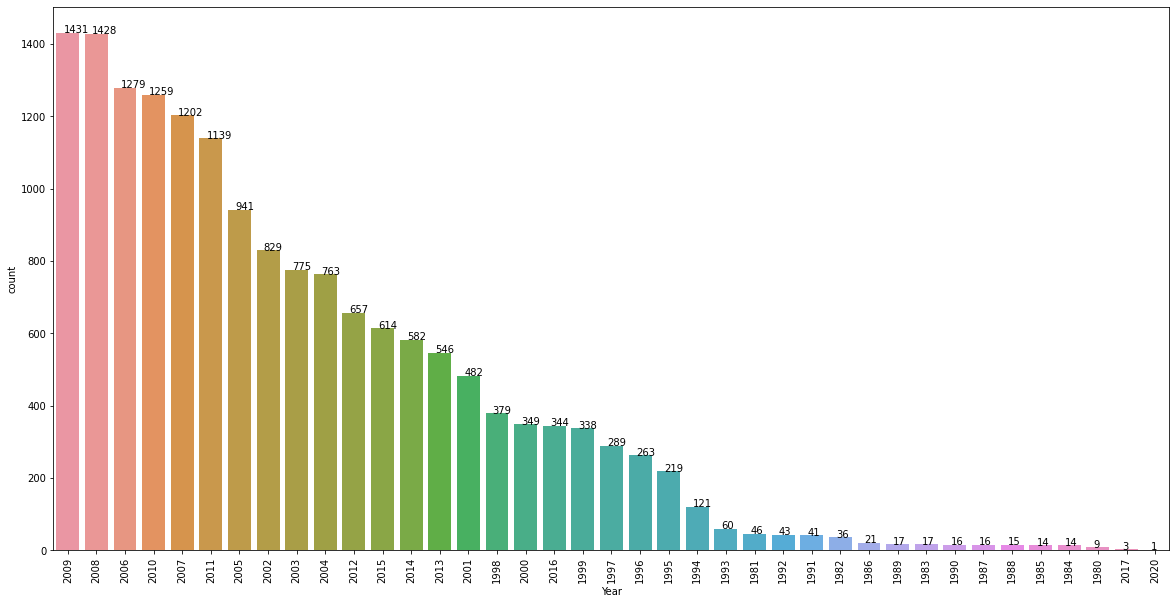

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax = sns.countplot(x = 'Year', data = df, order = df.Year.value_counts(ascending = False).index)
abs_values = df.Year.value_counts(ascending = False).values
for p in ax.patches:
  ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 90)

In [ ]:
df_year = df.groupby(by=['Year'])['Global_Sales'].sum()
df_year = df_year.reset_index()

In [ ]:
df_year

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

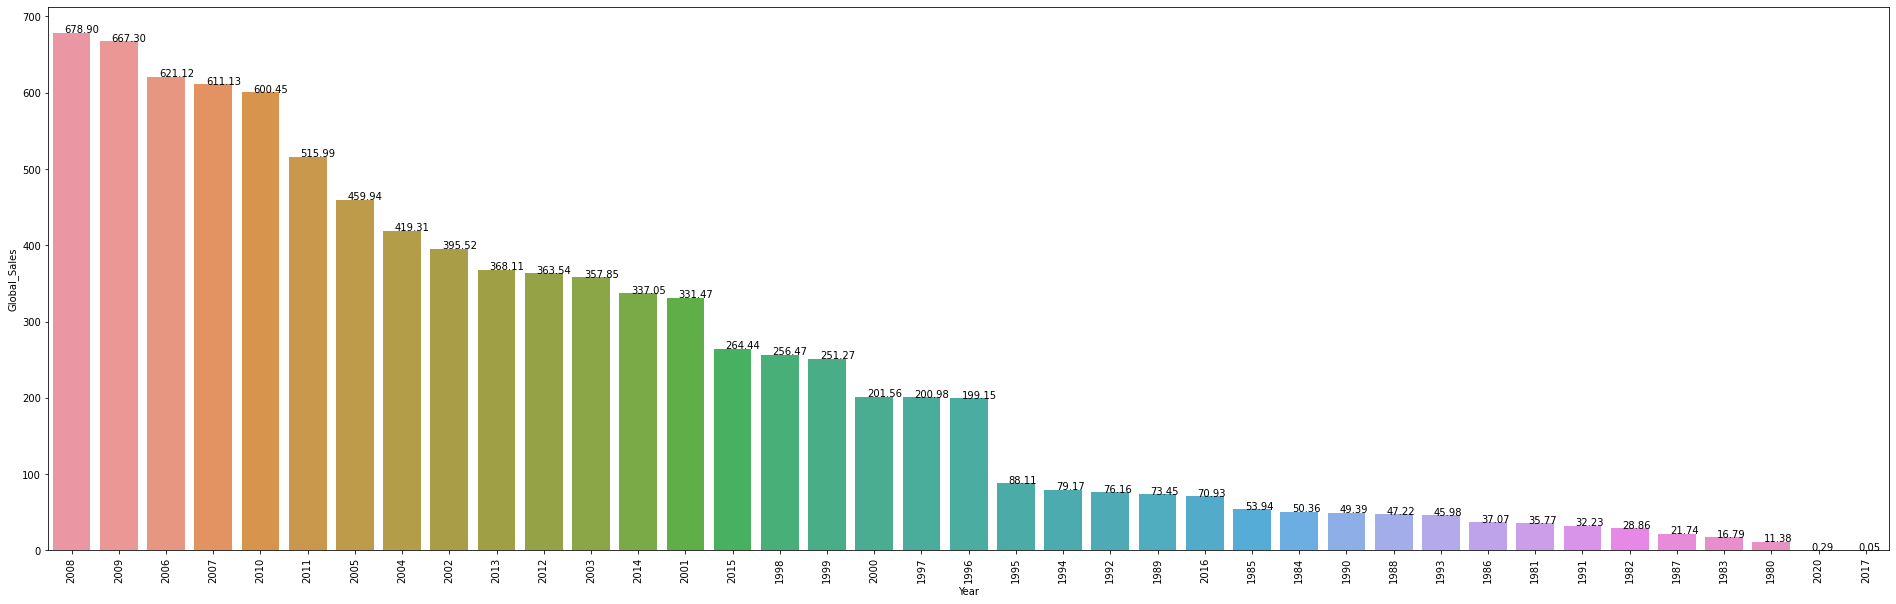

In [ ]:
plt.figure(figsize=(33,10))
ax = sns.barplot(x = 'Year' , y = 'Global_Sales', data = df_year, order = df_year.sort_values("Global_Sales", ascending = False).Year)
for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 90)

In [ ]:
df_Genre = df.groupby(df['Genre'])["Global_Sales"].sum()
df_Genre = df_Genre.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

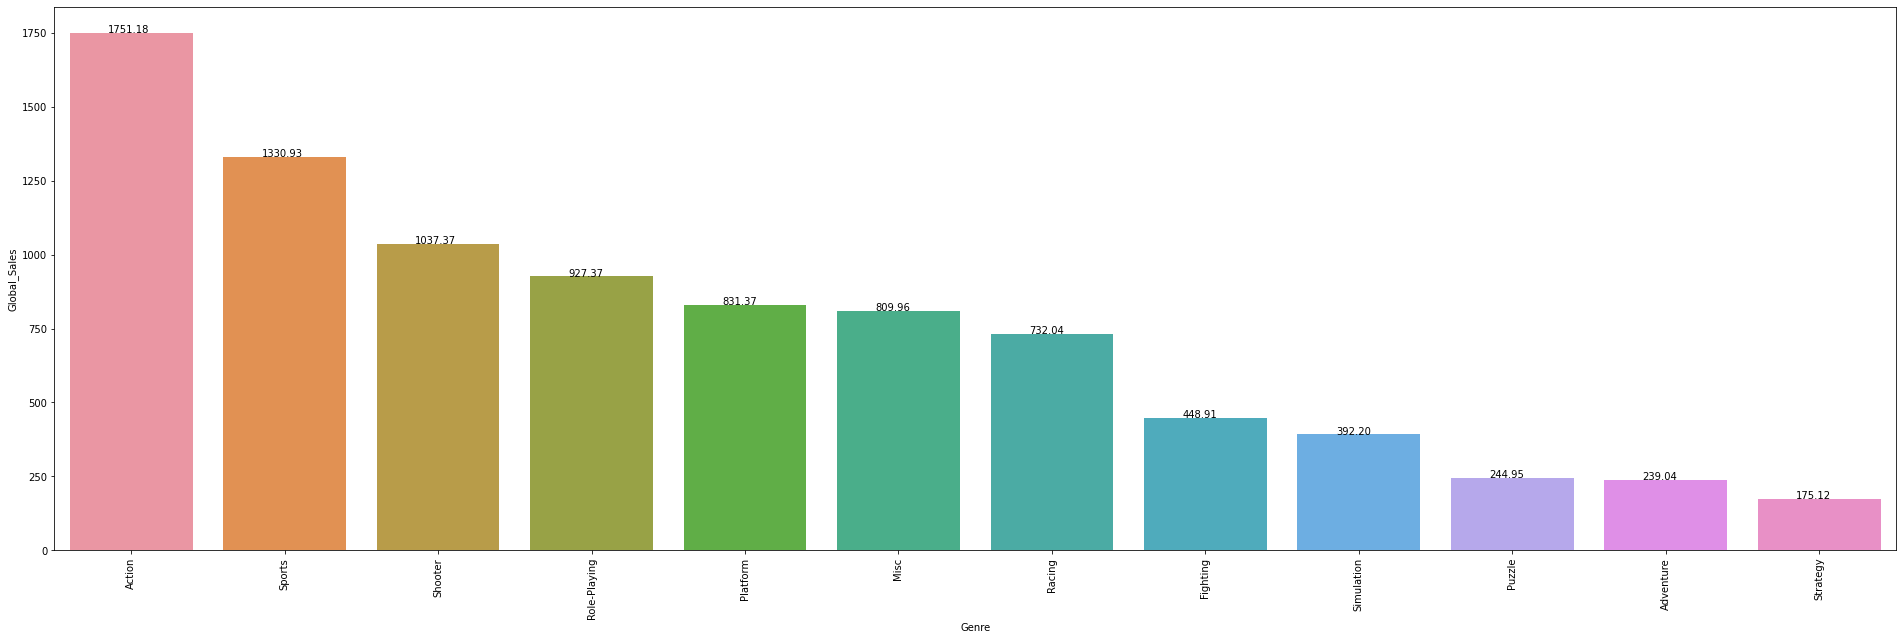

In [ ]:
plt.figure(figsize=(33,10))
ax = sns.barplot(x = 'Genre' , y = 'Global_Sales', data = df_Genre, order = df_Genre.sort_values("Global_Sales", ascending = False).Genre)
for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 90)

In [ ]:
df_Platform = df.groupby(df['Platform'])["Global_Sales"].sum()
df_Platform = df_Platform.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

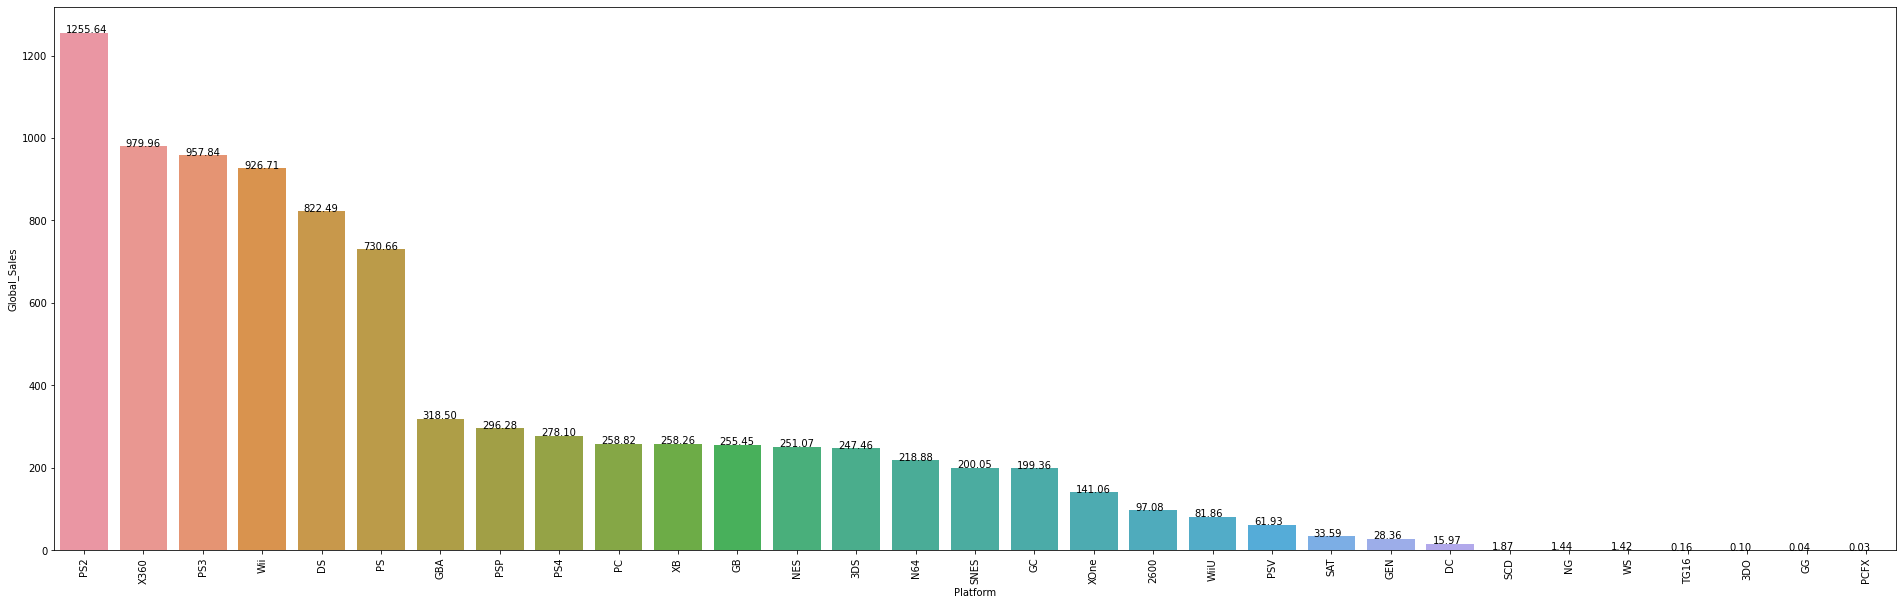

In [ ]:
plt.figure(figsize=(33,10))
ax = sns.barplot(x = 'Platform' , y = 'Global_Sales', data = df_Platform, order = df_Platform.sort_values("Global_Sales", ascending = False).Platform)
for p in ax.patches:
  ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.xticks(rotation = 90)

In [ ]:
comp_genre = df[['Genre' , 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

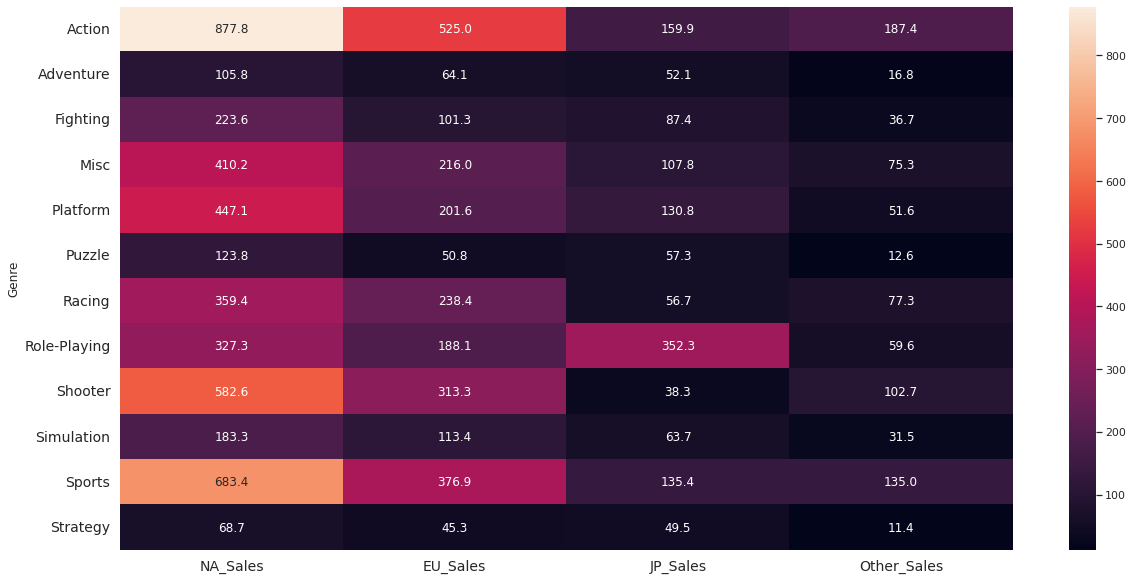

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale = 1)
sns.heatmap(comp_map, annot=True, fmt='.1f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
df_Publisher = df.groupby(by=['Publisher'])['Year'].count()
df_Publisher = pd.DataFrame(df_Publisher).reset_index()

In [ ]:
df_Publisher = df_Publisher.sort_values('Year', ascending = False)

In [ ]:
df_Publisher = df_Publisher[:20]

In [ ]:
total_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
total_sales = total_sales.sum().reset_index()

In [ ]:
total_sales

,index,0
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [ ]:
total_sales = total_sales.rename(columns={'index': 'region',
                                          0: 'sale'})
total_sales

,region,sale
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


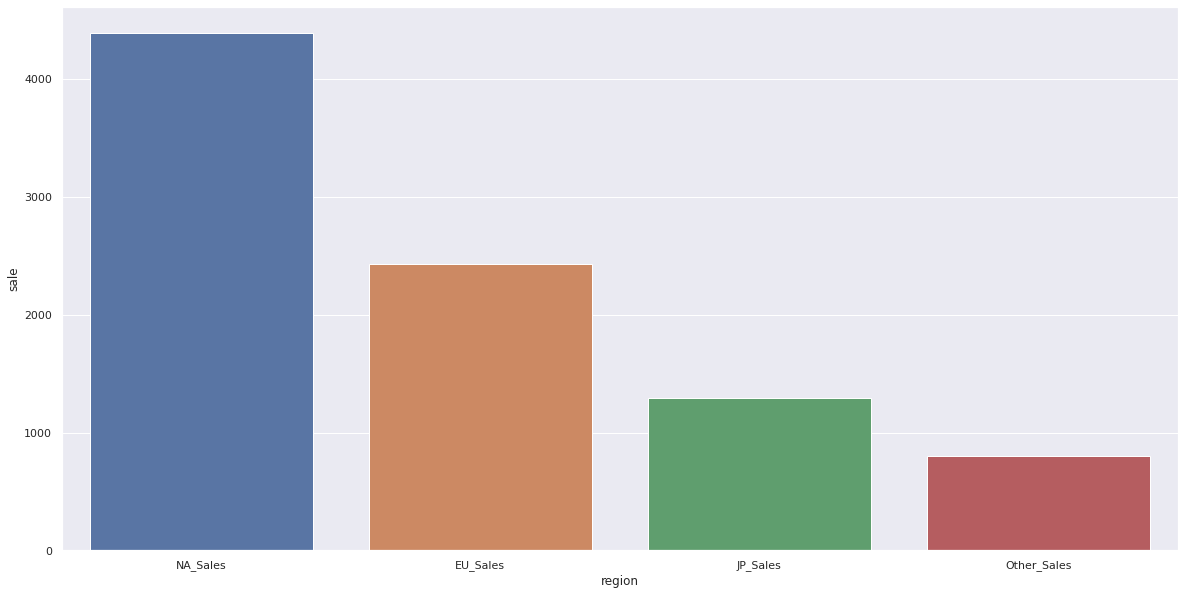

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'region', y='sale', data=total_sales)